In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
import json
acc_score = od()

In [2]:
def get_entropy_from_culling_factor(c):
    S = od()
    for E in range(-len(c), 1):
        if E in c:
            S[E] = np.log(c[E])
        for E1 in c:
            if (E1 > E):
                S[E] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_with_heat(c):
    S = od()
    for E in range(-len(c) + 1, 1):
        if E in c:
            S[E + 2] = np.log(c[E])
        for E1 in c:
            if (E1 < E):
                S[E + 2] += np.log(1 - c[E1])
    return S

In [3]:
def read_files(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c

    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat(culling_factor)
    
    return parameters

In [4]:
heat, cool = {
    "q": 5,
    "L": 96,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 0,
    "heat": True
}, {
    "q": 5,
    "L": 96,
    "R" : 131072,
    "nSteps" : 10,
    "seed" : 0,
    "heat": False
}

for parameters in [heat, cool]:
    parameters = read_files(parameters)

9216 131072 10 True


C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


9216 131072 10 False


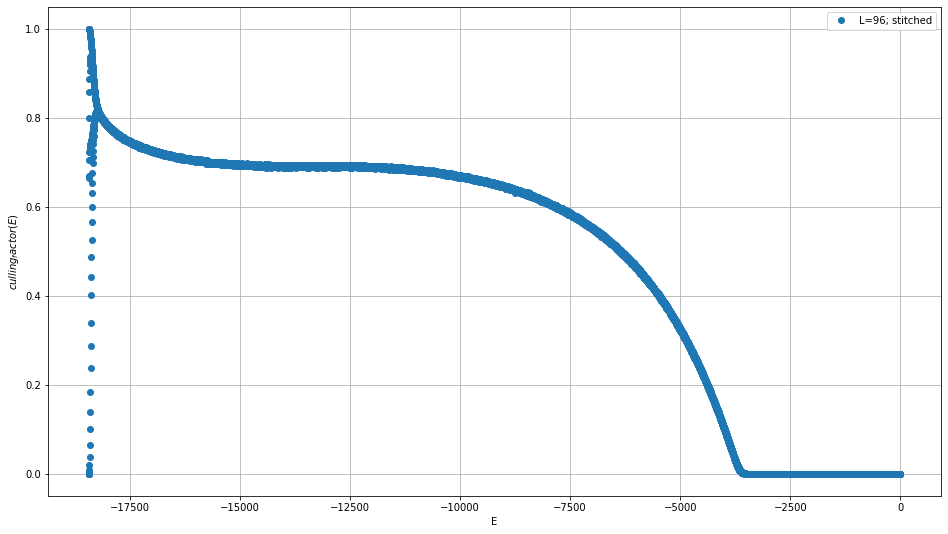

In [5]:
plt.figure(figsize=(16, 9))


#for L in lst:
    
plt.plot([E for E in cool["culling_factor"]], [S for E, S in cool["culling_factor"].items()], 'o', label="L={}; stitched".format(heat["L"]))
#    plt.plot([-32, -32], [0, 1])

plt.ylabel("$culling_factor(E)$")
plt.xlabel("E")
#plt.ylim([-200, -175])
#plt.xlim([-216, -175])
plt.legend()
plt.grid()

In [6]:
def stitch_S(heat, cool):
    #not infinite values
    niv = sorted( list({E for E, S in heat["S"].items() if not np.isinf(S)} & {E for E, S in cool["S"].items() if not np.isinf(S)}) )
    #chosen not infinite values
    cniv = niv[len(niv) // 3 : 2 * len(niv) // 3]
    shift = 0
    count = 0
    for E in cniv:
        shift += heat["S"][E] - cool["S"][E]
        count += 1
    shift /= count

    result = od()
    for E in range(- 2 * heat["L"] ** 2, 1):
        if E < max(cniv):
            result[E] = cool["S"][E]
        elif E >= max(cniv):
            result[E] = heat["S"][E] - shift    
    return result

In [7]:
stitched = stitch_S(heat, cool)

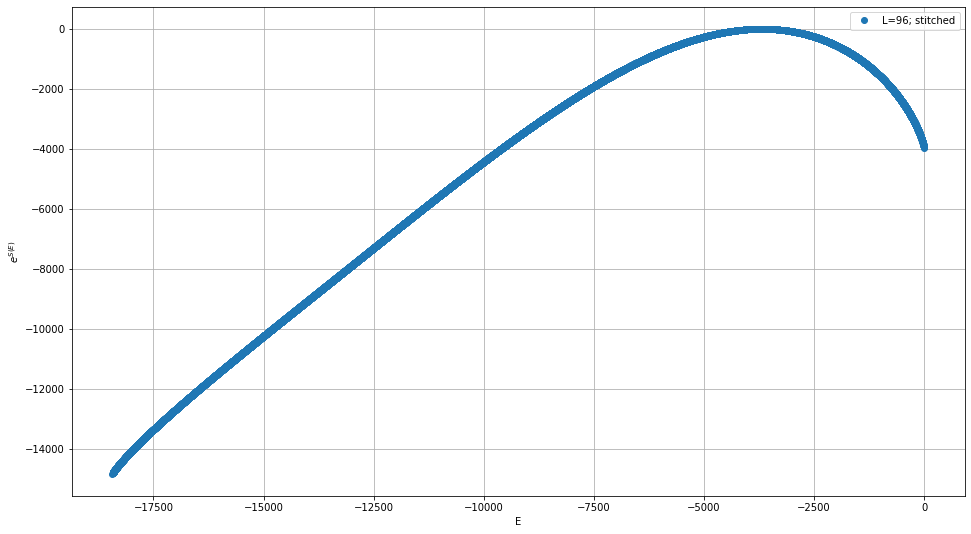

In [15]:
plt.figure(figsize=(16, 9))
lst = [12]

q = 5
N = 96
#for L in lst:
        
    #plt.plot([E for E in cool["S"]], [S for E, S in cool["S"].items()], 'o', label="L={}; cool".format(heat["L"]))
    
    #plt.plot([E for E in heat["S"]], [S for E, S in heat["S"].items()], 'o', label="L={}; heat".format(heat["L"]))

plt.plot([E for E in stitched], [S for E, S in stitched.items()], 'o', label="L={}; stitched".format(heat["L"]))
    
plt.ylabel("$e^{S(E)}$")
plt.xlabel("E")
#plt.ylim([1800, 1850])
#plt.xlim([-2, -0.75])
plt.legend()
plt.grid()

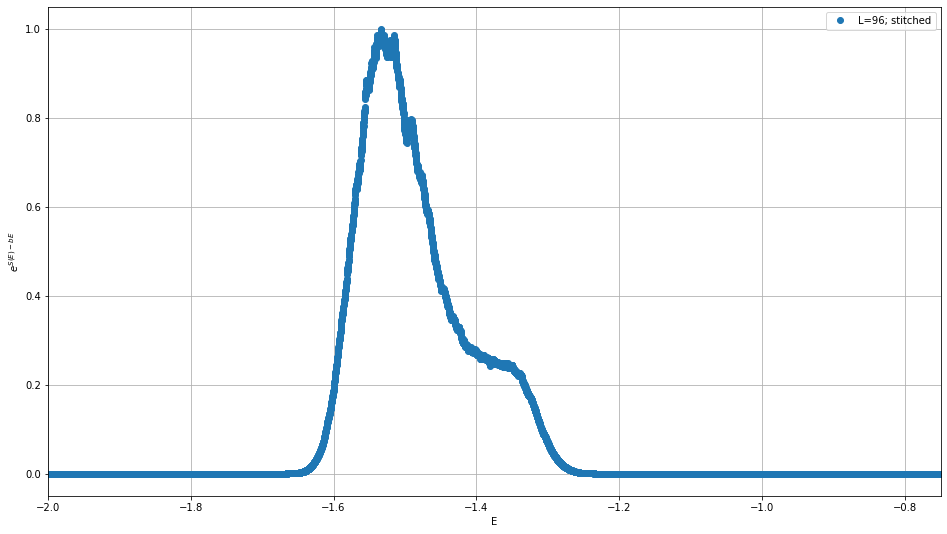

In [28]:
plt.figure(figsize=(16, 9))
lst = [12]

q = 5
N = 96
betta = np.log(1 + np.sqrt(q))
S0 = max(S - betta * E for E, S in stitched.items())
#for L in lst:
        
    #plt.plot([E for E in cool["S"]], [S for E, S in cool["S"].items()], 'o', label="L={}; cool".format(heat["L"]))
    
    #plt.plot([E for E in heat["S"]], [S for E, S in heat["S"].items()], 'o', label="L={}; heat".format(heat["L"]))

plt.plot([E / (N * N) for E in stitched], [np.exp(S - betta * E - S0) for E, S in stitched.items()], 'o', label="L={}; stitched".format(heat["L"]))
    
plt.ylabel("$e^{S(E) - b E}$")
plt.xlabel("E")
#plt.ylim([1800, 1850])
plt.xlim([-2, -0.75])
plt.legend()
plt.grid()

In [9]:
with open("2dSquarePottsq5L48Entropy-Machta.txt", 'w') as f:
    json.dump(stitched, f)

In [10]:
{E: S for E, S in stitched.items()}

{-18432: -14832.323093096871,
 -18431: -inf,
 -18430: -inf,
 -18429: -inf,
 -18428: -14821.21564774012,
 -18427: -inf,
 -18426: -14820.527232310127,
 -18425: -14819.420172398666,
 -18424: -14811.361047626342,
 -18423: -14817.532435458681,
 -18422: -14809.974175054602,
 -18421: -14808.880210770607,
 -18420: -14801.877819082169,
 -18419: -14806.744669504887,
 -18418: -14800.076203570727,
 -18417: -14798.966637319263,
 -18416: -14792.609668579673,
 -18415: -14796.504358406257,
 -18414: -14790.515773857811,
 -18413: -14789.414921798798,
 -18412: -14783.71317252597,
 -18411: -14786.935597832804,
 -18410: -14781.406553984187,
 -18409: -14780.305818990422,
 -18408: -14774.957700345321,
 -18407: -14777.647602481638,
 -18406: -14772.474327185233,
 -18405: -14771.364308325423,
 -18404: -14766.368141245732,
 -18403: -14768.565762588772,
 -18402: -14763.738709264904,
 -18401: -14762.629677813158,
 -18400: -14757.900472316673,
 -18399: -14759.720301663192,
 -18398: -14755.14839397506,
 -18397: -147